In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score



**1. Eksplorasi Awal**

**a. Berapa jumlah total penumpang dalam data**

In [7]:
# Membaca data
df = pd.read_csv('D:/UNNES/Semester 4/Penambangan Data dan Analisis Bisnis/Titanic-Dataset.csv')

# 1.a Jumlah total penumpang
total_passengers = len(df)
print(f"Jumlah total penumpang: {total_passengers}")


Jumlah total penumpang: 891


**b. Berapa jumlah penumpang yang selamat dan tidak selamat? Tampilkan dalam bentuk tabel dan grafik**

In [8]:
survival_counts = df['Survived'].value_counts().rename(index={0: 'Tidak Selamat', 1: 'Selamat'})
survival_counts

Survived
Tidak Selamat    549
Selamat          342
Name: count, dtype: int64

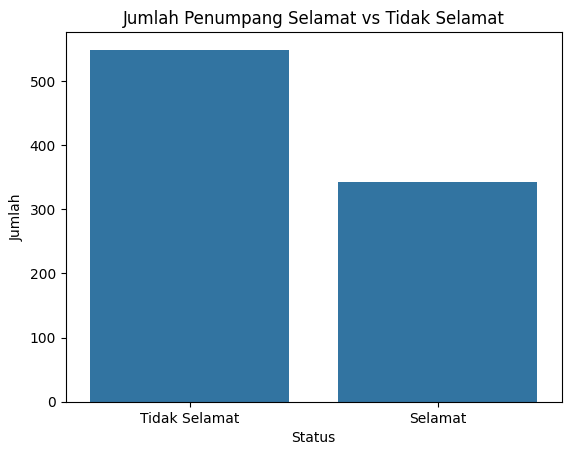

In [10]:
sns.barplot(x=survival_counts.index, y=survival_counts.values)
plt.title('Jumlah Penumpang Selamat vs Tidak Selamat')
plt.ylabel('Jumlah')
plt.xlabel('Status')
plt.show()

**c. Berapa rata-rata umur penumpang? Dan siapa penumpang termuda dan tertua**

In [18]:
# Rata-rata umur
rata_rata_umur = df['Age'].mean()

# Penumpang termuda
termuda = df.loc[df['Age'].idxmin()][['Name', 'Age']]

# Penumpang tertua
tertua = df.loc[df['Age'].idxmax()][['Name', 'Age']]

# Menampilkan hasil
print("Rata-rata umur penumpang:", rata_rata_umur)
print("Penumpang termuda:", termuda)
print("Penumpang tertua:", tertua)

Rata-rata umur penumpang: 29.69911764705882
Penumpang termuda: Name    Thomas, Master. Assad Alexander
Age                                0.42
Name: 803, dtype: object
Penumpang tertua: Name    Barkworth, Mr. Algernon Henry Wilson
Age                                     80.0
Name: 630, dtype: object


**d. Berapa jumlah penumpang berdasarkan jenis kelamin? Siapa yang lebih banyak? Visualisasikan**

Jumlah berdasarkan jenis kelamin:
Sex
male      577
female    314
Name: count, dtype: int64


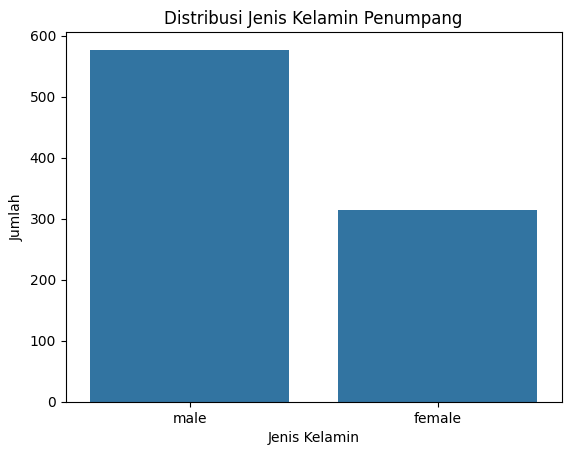

In [19]:
gender_counts = df['Sex'].value_counts()
print("Jumlah berdasarkan jenis kelamin:")
print(gender_counts)

# Visualisasi
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Distribusi Jenis Kelamin Penumpang')
plt.ylabel('Jumlah')
plt.xlabel('Jenis Kelamin')
plt.show()

**e. Tampilkan jumlah penumpang berdasarkan kelas (Pclass) dan berapa persen dari total data yang berada di kelas 1? Visualisasikan**

Jumlah penumpang berdasarkan kelas:
Pclass
1    216
2    184
3    491
Name: count, dtype: int64
Persentase penumpang di kelas 1: 24.24%


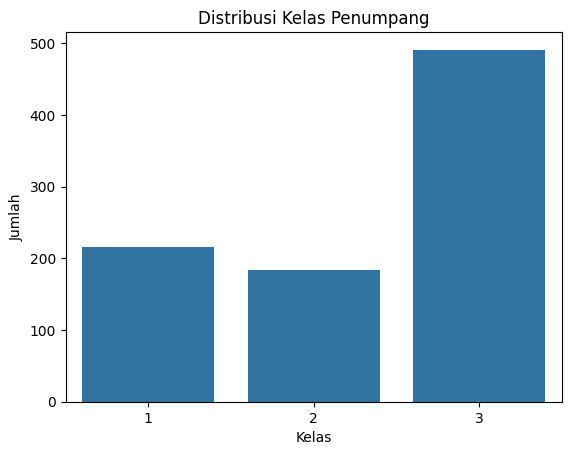

In [20]:
# Hitung jumlah berdasarkan kelas
class_counts = df['Pclass'].value_counts().sort_index()
persen_kelas1 = (class_counts[1] / len(df)) * 100

print("Jumlah penumpang berdasarkan kelas:")
print(class_counts)
print(f"Persentase penumpang di kelas 1: {persen_kelas1:.2f}%")

# Visualisasi
sns.barplot(x=class_counts.index.astype(str), y=class_counts.values)
plt.title('Distribusi Kelas Penumpang')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()


**2. Preprocessing**

**a. Apakah terdapat missing value pada data tersebut?**

In [21]:
# Cek missing values per kolom
missing_values = df.isnull().sum()
print("Jumlah missing values per kolom:")
print(missing_values)


Jumlah missing values per kolom:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ya, terdapat missing value

**b. Jika ya, apa yang anda lakukan?**

In [22]:
# Isi missing pada kolom 'Age' dengan median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Isi missing pada kolom 'Embarked' dengan modus
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Hapus kolom 'Cabin' karena terlalu banyak missing values
df.drop(columns='Cabin', inplace=True)

print("Missing values setelah ditangani:")
print(df.isnull().sum())


Missing values setelah ditangani:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_6244\3921996505.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6244\3921996505.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

**c. Apakah terdapat outlier pada data tersebut? Jelaskan apa itu outlier!**

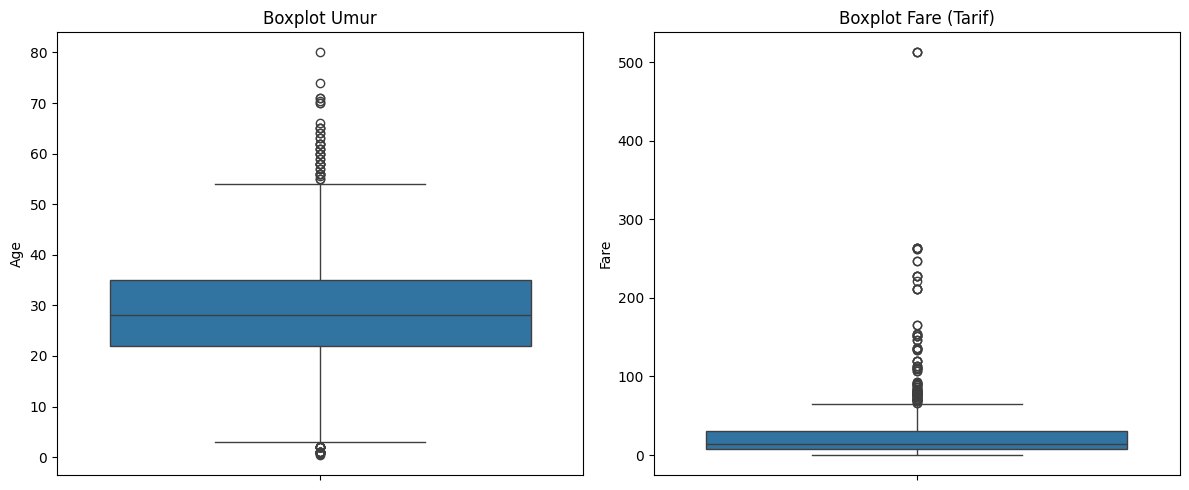

In [23]:
# Visualisasi outlier
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df, y='Age', ax=axes[0])
axes[0].set_title('Boxplot Umur')

sns.boxplot(data=df, y='Fare', ax=axes[1])
axes[1].set_title('Boxplot Fare (Tarif)')

plt.tight_layout()
plt.show()


Ya, terdapat outlier.
Outlier adalah nilai yang berbeda signifikan dari nilai lainnya dalam suatu kumpulan data

**d. Apakah outlier pada data tersebut perlu diatasi serta bagaimana cara mengatasinya?**

Tergantung konteks.
Kalau outlier karena kesalahan input maka perlu dihapus.
Kalau memang mencerminkan kondisi nyata (misal penumpang kaya bayar mahal) maka bisa tetap dipakai.

In [24]:
# Fungsi untuk hapus outlier menggunakan IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Contoh: hapus outlier di kolom Fare
df_no_outliers = remove_outliers_iqr(df, 'Fare')
print(f"Jumlah data sebelum: {len(df)}")
print(f"Jumlah data sesudah hapus outlier Fare: {len(df_no_outliers)}")


Jumlah data sebelum: 891
Jumlah data sesudah hapus outlier Fare: 775


e. Jika dibutuhkan silakan lakukan transformasi/standarisasi/scalling terhadap data tersebut?

In [26]:
# Ambil kolom numerik
numerik = ['Age', 'Fare']
scaler = StandardScaler()

# Transformasi dan simpan ke DataFrame baru
df_scaled = df.copy()
df_scaled[numerik] = scaler.fit_transform(df_scaled[numerik])

print("Data setelah distandarisasi:")
print(df_scaled[numerik].head())


Data setelah distandarisasi:
        Age      Fare
0 -0.565736 -0.502445
1  0.663861  0.786845
2 -0.258337 -0.488854
3  0.433312  0.420730
4  0.433312 -0.486337


**3. Modelling**

**a. Jelaskan proses pembagian data menjadi data training dan testing dan alasan mengapa perlu membagi data tersebut.**

Data dibagi menjadi 80% untuk pelatihan dan 20% untuk pengujian menggunakan train_test_split.

Alasan: untuk mengetahui seberapa baik model dapat memprediksi data baru yang belum pernah dilihat.

In [36]:
# Salin dataframe agar aman
df_model = df.copy()

# Encode kolom kategorikal
le = LabelEncoder()
df_model['Sex'] = le.fit_transform(df_model['Sex'])  # male=1, female=0
df_model['Embarked'] = le.fit_transform(df_model['Embarked'])  # S=2, C=0, Q=1


X = df_model[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked']]
y = df_model['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

Jumlah data latih: 712
Jumlah data uji: 179


**b. Berapa persen pembagiannya? Mengapa memilih membagi dengan proporsi tersebut?**

In [37]:
print(f"Proporsi Training: {(len(X_train)/len(df))*100:.2f}%")
print(f"Proporsi Testing: {(len(X_test)/len(df))*100:.2f}%")

Proporsi Training: 79.91%
Proporsi Testing: 20.09%


Alasan: 80:20 dipilih karena cukup umum dan seimbang—cukup data untuk belajar, dan cukup untuk menguji.

**c. Buatlah model klasifikasi dari 3 algortima yang berbeda. Jelaskan masing-masing model dan cara kerjanya.**

In [38]:
logreg = LogisticRegression(max_iter=1000)
tree = DecisionTreeClassifier(random_state=42)
forest = RandomForestClassifier(random_state=42)

logreg.fit(X_train, y_train)
tree.fit(X_train, y_train)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Penjelasan
1. Logistic Regression adalah model klasifikasi yang digunakan untuk memprediksi probabilitas kejadian dua kelas, seperti selamat atau tidak selamat. Model ini bekerja dengan menghitung kombinasi linier dari fitur-fitur input dan mengubah hasilnya menjadi probabilitas menggunakan fungsi sigmoid. Jika probabilitas di atas ambang batas (misalnya 0.5), maka diklasifikasikan ke kelas 1 (selamat), jika tidak ke kelas 0.

2. Decision Tree Classifier bekerja dengan membuat struktur pohon yang membagi data berdasarkan fitur-fitur tertentu. Setiap percabangan (node) membuat keputusan berdasarkan kondisi tertentu, seperti "Apakah jenis kelamin laki-laki?". Proses ini terus berlanjut hingga mencapai keputusan akhir di daun pohon. Model ini mudah dipahami tetapi rentan terhadap overfitting.

3. Random Forest Classifier adalah gabungan dari banyak decision tree yang dilatih secara acak pada subset data dan fitur. Setiap pohon memberikan prediksi, dan hasil akhir dipilih berdasarkan suara terbanyak (voting). Model ini lebih akurat dan stabil dibanding decision tree tunggal karena mampu mengurangi risiko overfitting melalui proses ensemble.

**d. Berapa nilai evaluasi dari masing-masing model pada data uji? Apa arti dari masing-masing metrik evaluasi tersebut?**

In [40]:
y_pred_log = logreg.predict(X_test)
y_pred_tree = tree.predict(X_test)
y_pred_forest = forest.predict(X_test)

print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))

print("Decision Tree:")
print(classification_report(y_test, y_pred_tree))

print("Random Forest:")
print(classification_report(y_test, y_pred_forest))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179

Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82

Accuracy = keseluruhan ketepatan prediksi.

Precision = ketepatan prediksi untuk setiap kelas.

Recall = keberhasilan menemukan semua instance dari kelas.

F1-score = kombinasi precision & recall.

**e. Bandingkan hasil dari ketiga algoritma tersebut, mana yang paling bagus? Berikan ulasan kira-kira apa yang menyebabkan metode tersebut dapat memprediksi dataset anda dengan baik.**

In [43]:
acc_log = accuracy_score(y_test, y_pred_log)
acc_tree = accuracy_score(y_test, y_pred_tree)
acc_forest = accuracy_score(y_test, y_pred_forest)

print(f"Akurasi Logistic Regression: {acc_log:.2f}")
print(f"Akurasi Decision Tree: {acc_tree:.2f}")
print(f"Akurasi Random Forest: {acc_forest:.2f}")


Akurasi Logistic Regression: 0.81
Akurasi Decision Tree: 0.78
Akurasi Random Forest: 0.82


Algoritma yang paling bagus adalah Random Forest dengan nilai akurasi 0.82

Random Forest memberikan akurasi terbaik karena:
1. Lebih stabil dan tahan terhadap overfitting, karena tidak mengandalkan satu pohon saja.
2. Menangkap pola yang kompleks dalam data dengan lebih baik.
3. Lebih tahan terhadap noise atau data tidak bersih, karena hasil akhir berasal dari banyak model.

**4. Evaluasi**

**a. Berdasarkan classification report model terbaik, berapa nilai precision dan recall untuk prediksi penumpang yang "selamat"?**

In [44]:
# Classification report untuk Random Forest
report = classification_report(y_test, y_pred_forest, output_dict=True)

precision_selamat = report['1']['precision']
recall_selamat = report['1']['recall']

print(f"Precision untuk 'selamat' (1): {precision_selamat:.2f}")
print(f"Recall untuk 'selamat' (1): {recall_selamat:.2f}")


Precision untuk 'selamat' (1): 0.78
Recall untuk 'selamat' (1): 0.77


**b. Berapa banyak penumpang yang diprediksi selamat, dan berapa di antaranya benar-benar selamat?**

In [47]:
# Jumlah yang diprediksi selamat (prediksi = 1)
jumlah_prediksi_selamat = np.sum(y_pred_forest == 1)

# Jumlah yang benar-benar selamat di antara prediksi = 1
jumlah_benar_selamat = np.sum((y_pred_forest == 1) & (y_test == 1))

print(f"Jumlah penumpang yang diprediksi selamat: {jumlah_prediksi_selamat}")
print(f"Jumlah di antaranya yang benar-benar selamat: {jumlah_benar_selamat}")


Jumlah penumpang yang diprediksi selamat: 73
Jumlah di antaranya yang benar-benar selamat: 57
